## Week 9&10 Excercise (Veera Reddy Koppula)

**Activity 9: Extracting the Top 100 eBooks from Gutenberg**
Project Gutenberg encourages the creation and distribution of eBooks by encouraging volunteer efforts to digitize and archive cultural works. This activity aims to scrape the URL of Project Gutenberg's Top 100 eBooks to identify the eBooks' links. It uses BeautifulSoup4 to pars

Import the necessary libraries, including regex and beautifulsoup.

In [1]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

Check the SSL certificate

In [2]:
# Setting SSL Certificate context to not validate the certificate to avoid errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

Read the HTML from the URL.

In [3]:
url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(url)

Write a small function to check the status of the web request.

In [4]:
def check_status(r):
    if r.status_code==200:
        print("Success!")
    else:
        print("Failed!")

In [5]:
check_status(response)

Success!


Decode the response and pass this on to BeautifulSoup for HTML parsing.

In [6]:
decode = response.content.decode(response.encoding)

In [7]:
bsdecode = BeautifulSoup(decode, 'html.parser')

Find all the href tags and store them in the list of links. Check what the list looks like – print the first 30 elements.

In [8]:
lst_links=[] #Empty List
for link in bsdecode.find_all('a'): #functiont to extract and print all tags with href
    lst_links.append(link.get('href'))
lst_links[0:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 eBooks.

Initialize the empty list to hold the file numbers over an appropriate range and use regex to find the numeric digits in the link href string. Use the findall method.

In [9]:
booknum=[] #Empty list to capture the book Numbers

* Number 33 to 132 in the original list of links have the Top 100 ebooks' number. 
* Loop over appropriate range and use regex to find the numeric digits in the link (href) string.
* Hint: Use `findall()` method

In [10]:
for i in range(33,133):
    link=lst_links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknum.append(int(n[0]))

In [11]:
print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[84, 1342, 25344, 11, 46, 345, 2701, 2542, 64317, 1080, 844, 174, 43, 5200, 1952, 219, 1661, 98, 1260, 205, 1232, 41, 1727, 1250, 160, 23, 76, 2591, 7370, 4980, 408, 3207, 6130, 74, 2554, 55, 2852, 1400, 514, 16, 32992, 120, 2814, 4300, 2600, 1184, 16328, 66655, 2148, 45, 203, 34901, 5740, 63256, 215, 996, 3825, 158, 768, 66654, 58585, 35, 902, 1597, 1497, 66658, 36, 66659, 779, 43453, 42884, 829, 2500, 22381, 11030, 244, 2680, 3600, 28054, 66663, 1998, 135, 1001, 3296, 61, 1524, 7142, 521, 209, 10007, 140, 8492, 15399, 30254, 4517, 600, 4363, 730, 23700, 851]


What does the soup object's text look like? Use the .text method and print only the
first 2,000 characters (do not print the whole thing, as it is too long).

In [12]:
print(bsdecode.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2021-11-04171208
last 7 days1179647
last 30 days4946139



Top 100 EBooks yesterd

Search in the extracted text (using a regular expression) from the soup object to find the names of the top 100 eBooks (yesterday's ranking).

In [13]:
lst_titles_temp=[] # Empty list to hold titles

Create a starting index. It should point at the text Top 100 Ebooks yesterday. Use the splitlines method of soup.text. It splits the lines of text of the soup object.

In [14]:
start_idx=bsdecode.text.splitlines().index('Top 100 EBooks yesterday')

Loop 1-100 to add the strings of the next 100 lines to this temporary list. Hint: use the splitlines method.

In [15]:
for i in range(114):
    lst_titles_temp.append(bsdecode.text.splitlines()[start_idx+9+i])

Use a regular expression to extract only text from the name strings and append it to an empty list. Use match and span to find the indices and use them.

In [16]:
lst_titles=[]
for i in range(101):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

In [17]:
#Printing list of titles
for l in lst_titles:
    print(l)


Frankenstein
Pride and Prejudice by Jane Austen 
The Scarlet Letter by Nathaniel Hawthorne 
Alice
A Christmas Carol in Prose
Dracula by Bram Stoker 
Moby Dick
A Doll
The Great Gatsby by F
A Modest Proposal by Jonathan Swift 
The Importance of Being Earnest
The Picture of Dorian Gray by Oscar Wilde 
The Strange Case of Dr
Metamorphosis by Franz Kafka 
The Yellow Wallpaper by Charlotte Perkins Gilman 
Heart of Darkness by Joseph Conrad 
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
A Tale of Two Cities by Charles Dickens 
Jane Eyre
Walden
The Prince by Niccol
The Legend of Sleepy Hollow by Washington Irving 
The Odyssey by Homer 
Anthem by Ayn Rand 
The Awakening
Narrative of the Life of Frederick Douglass
Adventures of Huckleberry Finn by Mark Twain 
Grimms
Second Treatise of Government by John Locke 
Old Granny Fox by Thornton W
The Souls of Black Folk by W
Leviathan by Thomas Hobbes 
The Iliad by Homer 
The Adventures of Tom Sawyer
Crime and Punishment by Fyodor Dostoyevsk


**Activity 10: Building Your Own Movie Database by Reading an API**
In this activity, you will build a complete movie database by communicating and interfacing with a free API. You will learn about obtaining a unique user key that must be used when your program tries to access the API. This activity will teach you general chapters about working with an API, which are fairly common for other highly popular API services such as Google or Twitter. Therefore, after doing this exercise, you will be confident about writing more complex programs to scrape data from such services.

Import urllib.request, urllib.parse, urllib.error, and json.

In [18]:
import urllib.request, urllib.parse, urllib.error
import json

Load the secret API key (you have to get one from the OMDb website and use that; it has a daily limit of 1,000) from a JSON file stored in the same folder in a variable, by using json.loads.

Obtain a key and store it in JSON as APIkeys.json.
Open the APIkeys.json file.

My Key is saved in APIkey.json file

In [19]:
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

Assign the OMDb portal (http://www.omdbapi.com/?) as a string to a variable.
Create a variable called apikey with the last portion of the URL (&apikey=secretapikey), where secretapikey is your own API key.

In [20]:
keyurl = 'http://www.omdbapi.com/?'
apikey = '&apikey='+omdbapi

Write a utility function called print_json to print the movie data from a JSON file (which we will get from the portal).

In [21]:
# function to print movie data with the utility keys
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder. Use the
os module. The poster data is stored in the JSON key Poster. Use the Python command to open a file and write the poster data. Close the file after you're done. This function will save the poster data as an image file.

In [22]:
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

Write a utility function called search_movie to search for a movie by its name, print the downloaded JSON data, and save the movie poster in the local folder. Use a try-except loop for this. Use the previously created serviceurl and apikey variables. You have to pass on a dictionary with a key, t, and the movie name as the corresponding value to the urllib.parse.urlencode() function and then add the serviceurl and apikey to the output of the function to construct the full URL. This URL will be used to access the data. The JSON data has a key called Response. If it is True, that means the read was successful. Check this before processing the data. If it's not successful, then print the JSON key Error, which will contain the appropriate error message returned by the movie database.

In [23]:
def search_movie(title):
    try:
        url = keyurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

Test the search_movie function by entering Titanic.

In [24]:
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=fdd8a0ea
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico, Australia
Awards: Won 11 Oscars. 125 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.8
imdbVotes: 1,098,236
imdbID: tt0120338
--------------------------------------------------


Test the search_movie function by entering "Random_error" (obviously, this will not be found, and you should be able to check whether your error catching code is working properly).

In [25]:
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=fdd8a0ea
Error encountered:  Movie not found!


**3. Connect to the Twitter API and do a simple data pull**

a. If you don’t have a twitter account – create one at twitter.com/signup (you can delete the account after this assignment)

b. Sign in to apps.twitter.com

c. Click “Create New App”

d. Give your app a name and description

e. Agree to the developer agreement – you will want to make sure to indicate this is for a class project, and this step can take several days to get through, so don’t wait until last minute to complete this portion of the assignment

f. Create an access token

g. You should receive a consumer key and a token

h. Using either the instructions from the book on connecting to an API or for help look here – pull back data searching for “Bellevue University” and “Data Science” (or something else you are interested in)

i. How to Create a Twitter App and API Interface via Python. (Grogan, 2016)
ii. Welcome Python-Twitter’s Documentation!  (The Python-Twitter Developers, 2016)

In [26]:
# Importing Twitter and setting up my user keys
import twitter
api = twitter.Api(consumer_key='YjMSzmbU0mnbsHHFsgZDDGCvf',
  consumer_secret='8Q6XE9h589aqTLALdmPi2MH9fE8hD2MNKFtFoWC23m4EGYQ1PD',
    access_token_key='264722988-qfl7TYYL8KBazO3PaZ9XaMM6gpNWYoPIq6vLwzKn',
    access_token_secret='U31Wy9y8YWzZPyGpB9JxIWV4qFBna4i7NipsbBOFxBZvf')

In [27]:
# validating that the credentials are accurate
print(api.VerifyCredentials())

{"created_at": "Sat Mar 12 10:38:46 +0000 2011", "default_profile": true, "default_profile_image": true, "favourites_count": 2, "followers_count": 12, "friends_count": 40, "id": 264722988, "id_str": "264722988", "name": "Veera R Koppula", "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "veerakoppula", "status": {"created_at": "Sun Aug 02 10:01:53 +0000 2020", "id": 1289863987832578048, "id_str": "1289863987832578048", "la

In [28]:
#Searching for last 10 tweets with search term Bellevue University since 01/11/2021
api.GetSearch(term='Bellevue University', since=2021-11-1, count=10)

[Status(ID=1456712167668043776, ScreenName=BillyHeyen, Created=Fri Nov 05 19:56:59 +0000 2021, Text='RT @BillyHeyen: Bellevue’s Kearston Lunsford is heading to Tiffin University as a runner 🏃\u200d♀️'),
 Status(ID=1456697889258881027, ScreenName=StatisticsViews, Created=Fri Nov 05 19:00:15 +0000 2021, Text='Adjunct Instructor-Data Science - Bellevue, NE - Bellevue University https://t.co/4KTbysZj9S'),
 Status(ID=1456667648717172747, ScreenName=BellevueU, Created=Fri Nov 05 17:00:05 +0000 2021, Text='Happy #NationalCareerDevelopmentMonth! Every Bellevue University student is pre-registered on Handshake, an app des… https://t.co/ohNCPTjGmE'),
 Status(ID=1456648204980736012, ScreenName=MUCoachGilbert, Created=Fri Nov 05 15:42:49 +0000 2021, Text='RT @Midland_WBB: GAMEDAY for everyone!!\n       • Varsity will play Bellevue University in Bellevue, Nebraska with a tip-off of 3PM!…'),
 Status(ID=1456643865952219140, ScreenName=CSM_Flames, Created=Fri Nov 05 15:25:35 +0000 2021, Text='On the r

In [29]:
#Searching for last 10 tweets with data science
api.GetSearch(term='Data Science', count=10)

[Status(ID=1456616700959461376, ScreenName=FaheemYounus, Created=Fri Nov 05 13:37:38 +0000 2021, Text='New anti-COVID pill almost as good as the vaccine! \n\nTake at home, cut hospital, death risk by 90%\n\nDeveloped in 20… https://t.co/przEH7bGWh'),
 Status(ID=1456633685873242117, ScreenName=Dereklowe, Created=Fri Nov 05 14:45:08 +0000 2021, Text='Pfizer reports terrific data on a new mechanism to shut down the coronavirus. This has to be combined with molnupir… https://t.co/fS2WAW3mSs'),
 Status(ID=1456645363243184132, ScreenName=WIONews, Created=Fri Nov 05 15:31:32 +0000 2021, Text='#Gravitas with @palkisu:\n\n+ Was @Pfizer\'s vaccine trial data "falsified"? Damaging allegations by whistleblower\n\n+… https://t.co/1ExqXpifuK'),
 Status(ID=1456837512723378176, ScreenName=TheCuriousLuke, Created=Sat Nov 06 04:15:04 +0000 2021, Text='RT @TechTargetNews: As #TC21 nears, @tableau is focused on using #AI and #MachineLearning to enable business users with #DataScience skills…'),
 Status(ID

**4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.**

a. Line

b. Scatter

c. Bar

d. Histogram

e. Density Plot

f. Pie Chart

In [30]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv("Boston_housing.csv",error_bad_lines=False, index_col=False, dtype='unicode')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,391.99,9.67,22.4
502,0.04527,0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21,396.9,9.08,20.6
503,0.06076,0,11.93,0,0.573,6.976,91,2.1675,1,273,21,396.9,5.64,23.9
504,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,393.45,6.48,22


In [32]:
df.dtypes

CRIM       object
ZN         object
INDUS      object
CHAS       object
NOX        object
RM         object
AGE        object
DIS        object
RAD        object
TAX        object
PTRATIO    object
B          object
LSTAT      object
PRICE      object
dtype: object

In [33]:
df['CRIM']=df['CRIM'].astype(float,errors='raise')
df['INDUS']=df['INDUS'].astype(float,errors='raise')
df['NOX']=df['NOX'].astype(float,errors='raise')
df['RM']=df['RM'].astype(float,errors='raise')
df['AGE']=df['AGE'].astype(float,errors='raise')
df['DIS']=df['DIS'].astype(float,errors='raise')
df['PTRATIO']=df['PTRATIO'].astype(float,errors='raise')
df['B']=df['B'].astype(float,errors='raise')
df['LSTAT']=df['LSTAT'].astype(float,errors='raise')
df['PRICE']=df['PRICE'].astype(float,errors='raise')
df['ZN']=df['ZN'].astype(float,errors='raise')
df['CHAS']=df['CHAS'].astype(int,errors='raise')
df['RAD']=df['RAD'].astype(int,errors='raise')
df['TAX']=df['TAX'].astype(int,errors='raise')

In [34]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

Line Graph for all columns

<AxesSubplot:>

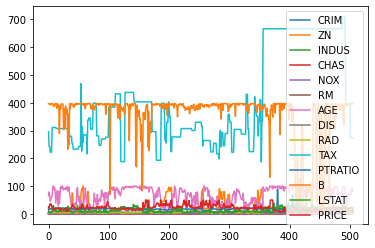

In [35]:
df.plot.line()

Scatter Plot againsr CRIM and PRICE of the area

<AxesSubplot:xlabel='CRIM', ylabel='PRICE'>

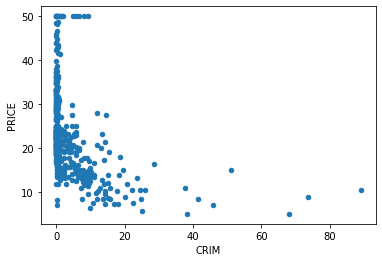

In [36]:
df.plot.scatter(x='CRIM',y='PRICE')

Histogram of PRICE column

array([[<AxesSubplot:title={'center':'AGE'}>]], dtype=object)

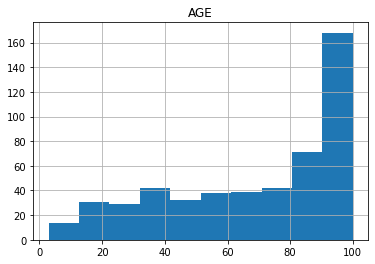

In [37]:
df.hist(column='AGE',bins=10)